# Decision Trees

Decision trees are widely used models for classification/regression tasks, however we're going to focus on decision tree classifiers. A decision tree learns a hierarchy of if/else questions, eventually leading to a decision.  

The series of question that needs to be asked to eventually classify different items can be espressed as a tree. You start at the top and work your way down the tree through decision boundaries until you reach the end of the tree.  

Each node of the tree represents a question. The top of the tree is the root or the root node. After answering the root question, you move down to a branch node. Branches have arrows pointing to and away from them, leaf nodes are the end of the tree. 

## How Do Decision Trees Work? 

Decision trees ask a hierarchy of questions about the data and split the data accordingly. But how does your decision tree know which question to ask first? By determining which question will give you the most information as quantified by the criterion specified.

That's a confusing sentence so I'm going to do an easy example.

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn import tree

data = {
    'Workout?': ['Yes', 'Yes', 'No','No', 'Yes'],
    'Eat Well?': ['No', 'No', 'Yes', 'No', 'Yes'],
    'Mile?': ['Yes', 'No','Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

df.head()

,Workout?,Eat Well?,Mile?
0,Yes,No,Yes
1,Yes,No,No
2,No,Yes,Yes
3,No,No,No
4,Yes,Yes,Yes


## How do Decision Trees Work Continued?

We have a small data set, and we are trying to figure out if someone can run a mile based on whether or not they work out and/or eat well.

### Decision tree Root Determination

We need to first determine whether workout or eat well is at the top of the decision tree. We do this by determining which column is the best predictor for being able to run a mile. We first feed to track how well working out predicts being able to run a mile.

### Workout
- 2 people who workout can run a mile
- 1 person who works out cannot run a mile

- 1 person who works out can run a mile
- 1 person who works out cannot run a mile

### Eat Well
- 2 people who eat well can run a mile
- 0 people who eat well cannot run a mile

- 1 person who does not eat well can run a mile
- 2 people who do not eat well cannot run a mile

Three of our leaves are what is known as impure meaning they contain a mixture of yes's and no's. Eating well is pure in that is contains only yes's. Eating well should be our root node. For the sake of demonstration, I'm going to pretend that none of our nodes are pure so that I can derive the root node from calculations.

### Quantifying Leaf Impurity to Derive Decision Tree Root Node

There are several ways to quantify impurity they include:
- Gini impurity
- Entropy
- Information Gain

I'm going to calculate Gini impurity of the leaves.

#### Calculating Gini Impurity To Determine Decision Tree Nodes

The equation for gini impurity is:

Gini impurity = 1-(probability of yes)^2 - (probability of no) ^2

##### Gini Impurity for Workout

1 - (0.66)^2 - (0.33)^2 = 0.4555

##### Gini Impurity for Eating Well

1 - (0)^2 - (1)^2 = 0.0

So by using Gini Impurity, we can determine that eating well has the most pure leaves and that Eating well should be the root node of our decision tree.

## Visualizing Your Decision Tree

Below is your decision tree visualized.


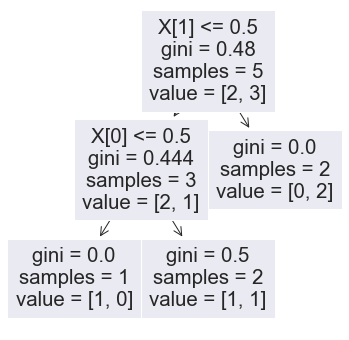

In [30]:
#assign numerical values to categoricals
categorical = ['Workout?','Eat Well?','Mile?']
for column in categorical:
    df[column]=pd.Categorical(df[column]).codes

#create x/y
X = df.drop('Mile?', axis=1)
y = df['Mile?']

#import classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X, y)

#graph figure
plt.figure(figsize=(6,6))
tree.plot_tree(model);

In [18]:
data = {
    'X': [-1,1, 3, 2, 6, 7, -5, 0],
    'Y': [11, 4, 7, -2, 0, 3, -1, 10],
    'Class': ['A', 'A','A', 'B', 'B', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

df.head(8)

,X,Y,Class
0,-1,11,A
1,1,4,A
2,3,7,A
3,2,-2,B
4,6,0,B
5,7,3,B
6,-5,-1,A
7,0,10,B


<AxesSubplot:xlabel='X', ylabel='Y'>

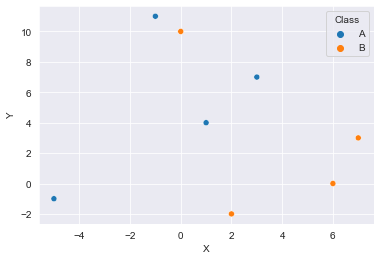

In [19]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='X', y='Y', hue='Class')

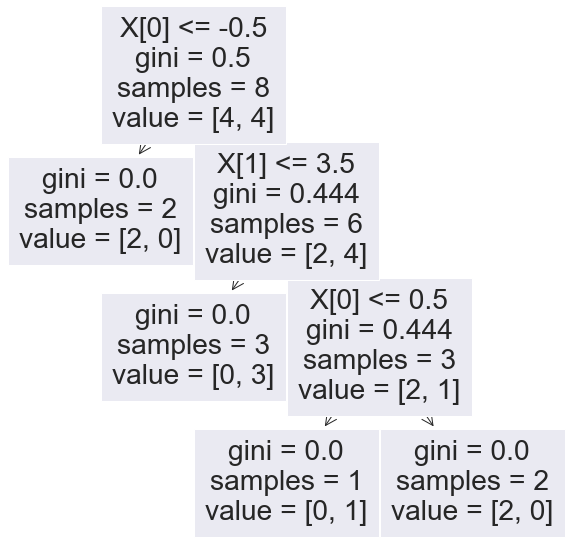

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X, y)

plt.figure(figsize=(10,10))
tree.plot_tree(model);

## Advantages of Decision Trees

Decision trees are one of the most widely used supervised machine learning algorithms. They have several advantages including: 

- MultiClass Capable 
- Easy interpretation 
- Data type robustness 
- No preprocessing 

Decision trees are easy to interpret. In fact in the sklearn module there is a function that allows you to create a visualization of your decision tree from root node to leaf.  

Decision trees have data type robustness in that the algorithm handles numerical and categorical data equally well. A decision tree looks at each data column individually so your don't have to impute categorical data or transform/normalize numerical data to be more similar. 

## Disadvantages of Decision Trees

Disadvantages of Decision trees are logical when you think about how the model functions. They include: 

- Overfitting, the creation of overly complex trees that do not generalize well. 
- Instability, small variations in data can give you radically different decision trees. 

Overfitting is the biggest downside with decision trees. Overfitting means your algorithm is fit to your training data very well, potentially even giving you a perfect accuracy score. However when you introduce new data, it misclassifies a large portion of it. I've seen decision trees with cose to a 100% accuracry score on the training data, and an accuracy score of <50% on new data. This indicates you created a model that was TOO specialized and you need to generalize it back.   

There are two ways of dealing with overfitting, either pruning your tree or limiting how it grows. Both of these methods trade accuracy of your model on your trading data for the ability to generalize better with new data.  

## Visualizing the Decision Boundary of a Decision Tree

What does a decision boundary look like? I'm going to create a new data set and graph the decision boundary for it.

In [38]:
data = {
    'X': [-1,1, 3, 2, 6, 7, -5, 0],
    'Y': [11, 4, 7, -2, 0, 3, -1, 10],
    'Class': [0, 0, 0, 1,1,1,0,1]
}
df = pd.DataFrame(data)

df.head(8)

,X,Y,Class
0,-1,11,0
1,1,4,0
2,3,7,0
3,2,-2,1
4,6,0,1
5,7,3,1
6,-5,-1,0
7,0,10,1


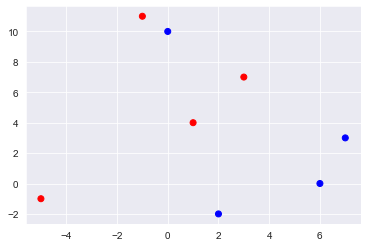

In [42]:
colors = np.where(df['Class']==0, 'r', 'b')
plt.scatter(df['X'], df['Y'], color=colors)

## DecisionTreeClassifier Important Parameters

Important parameters for the skLearn Decision Tree Classifier method include parameters that direct how data points are sorted and separated and parameters that help with overfitting by putting limits on tree growth.

### Parameters for Sorting

- Criterion: Specifies the function to measure the quality of a split.
- Splitter: The strategy used to split at each node.

### Parameters Influencing Tree Growth

- max_depth: maximum number of steps between root node and leaves
- min_samiples_split: minimum number of samples required for there to be a split into new branches or leaves.
- min_samples_leaf: specifies minimum samples per leaf
- max_leaf_nodes: specifies the maximum number of leaves you can have

## skLearn Decision Tree Exploration and Analysis

You can load the algorithm from sklearn:  

sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

Full documentation available here (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

I'm going to load my penguins dataset, turn categoricals into numeric, split my data for training/testing and get an accuracy score.

In [18]:
df = sns.load_dataset('penguins')
df.dropna(axis=0, how='any', inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [30]:
#lists of categoricals/numerics
categorical = ['species','island','sex']
numeric = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

#using pandas categorical method with .codes
df['species']=pd.Categorical(df['species']).codes

#using replace
df['island'].replace(['Torgersen','Biscoe','Dream'],[0,1,2], inplace=True)

#using get dummies
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

X = df.drop('sex', axis=1)
y=df['sex']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

In [46]:
method = tree.DecisionTreeClassifier(random_state=1)
method.fit(X_train,y_train)
predictions = method.predict(X_test)

from sklearn.metrics import accuracy_score
a_score = str(round(accuracy_score(y_test, predictions),3))
print('Accuracy Score:  '+ a_score)

Accuracy Score:  0.917


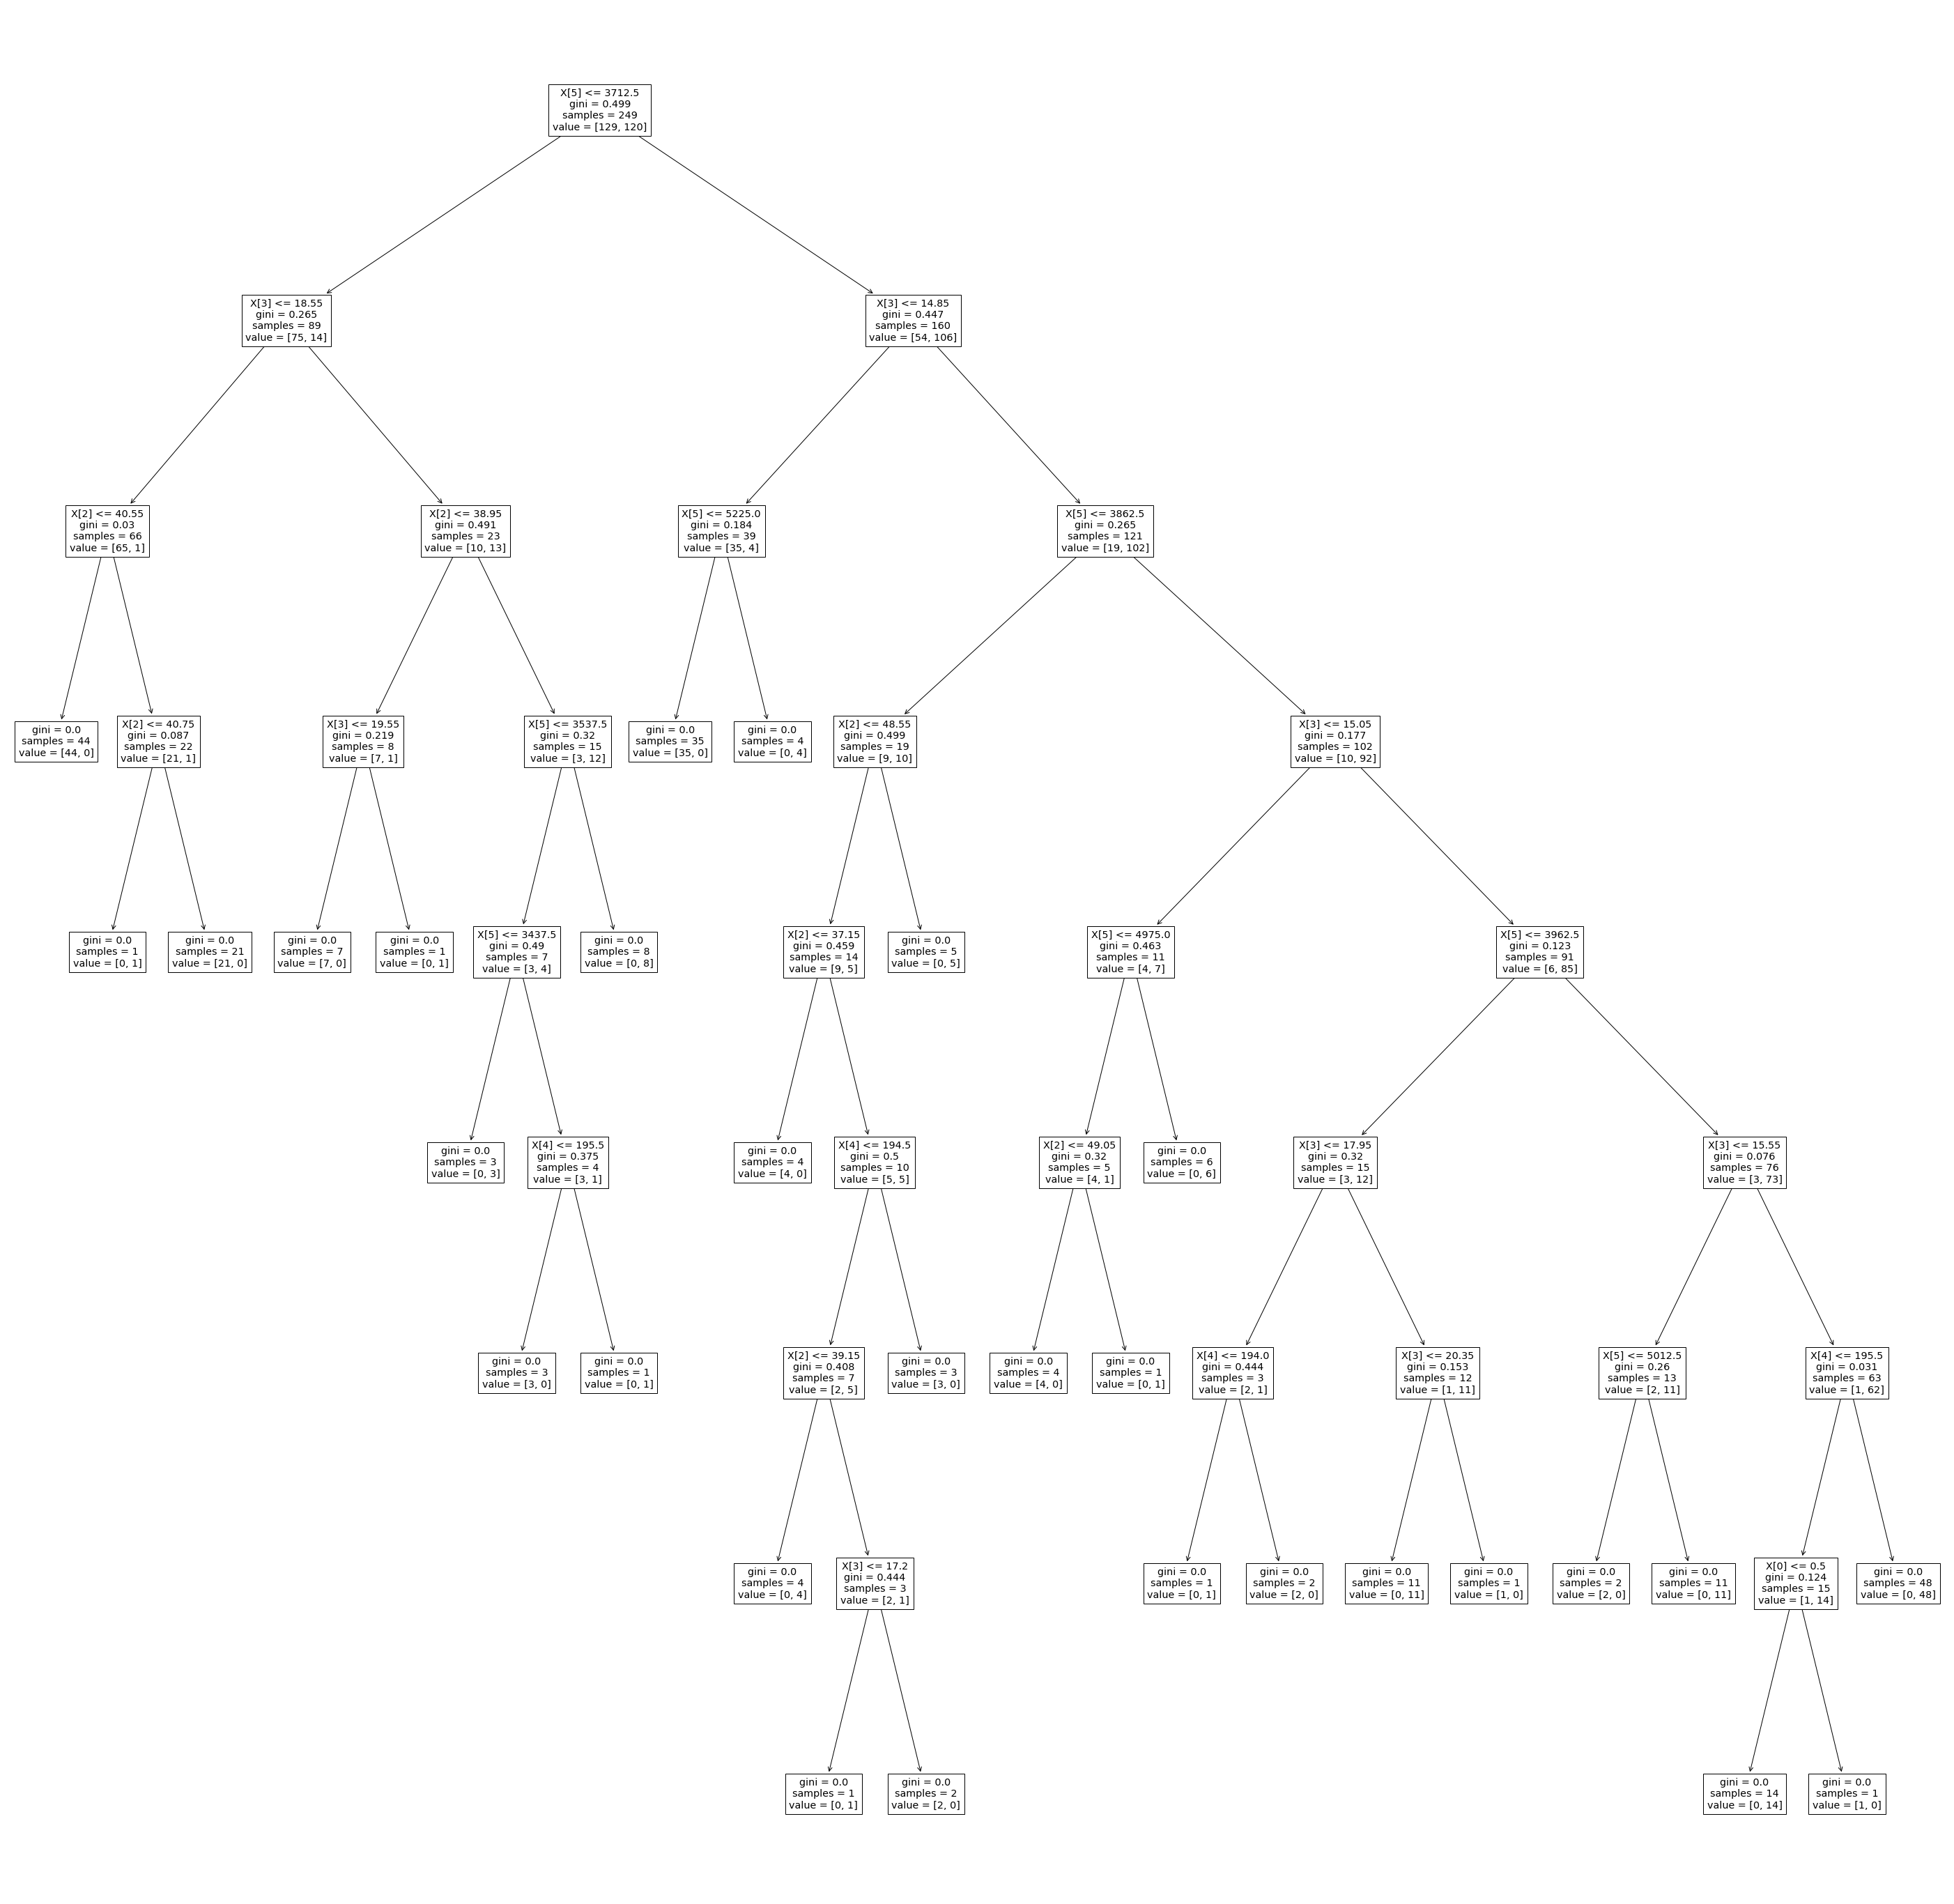

In [47]:
plt.figure(figsize=(50,50))
tree.plot_tree(method);

## Exploration and Analysis Continued

I got an accuracy score of 0.917 right off the bat which is better than anything I got with KNN and matches the max I got with SVM with a decent amount of hyperparameter tuninng. You can see from the decision tree visualization that my tree has 8 levels to it. So that's one thing we can adjust to see if we are overfitting.

I'm not going to screw around with the parameters that change how individual data points are sorted, I'm just going to be exploring how I can influence tree growth, because that is the key to keeping decision trees from overfitting.

### Tree Depth

I'm going to loop through tree depths from the minimum which is 2 to the max of 8 and see how accuracy scores change based on limiting tree growth.

In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

tree_depth = []
accuracy = []

for depth in [1, 2,3,4,5,6,7,8]:
    method = tree.DecisionTreeClassifier(max_depth=depth, random_state=1)
    method.fit(X_train,y_train)
    predictions = method.predict(X_test)   
    a_score = str(round(accuracy_score(y_test, predictions),3))
    
    tree_depth.append(depth)
    accuracy.append(a_score)
    
df_depth = pd.DataFrame(tree_depth)
df_depth['Accuracy Score'] = accuracy
df_depth = df_depth.rename(columns = {0:'Tree Depth'})
df_depth.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_depth.head(10)

,Tree Depth,Accuracy Score
2,3,0.952
1,2,0.929
5,6,0.929
6,7,0.929
7,8,0.917
3,4,0.905
4,5,0.893
0,1,0.714


<AxesSubplot:xlabel='Tree Depth', ylabel='Accuracy Score'>

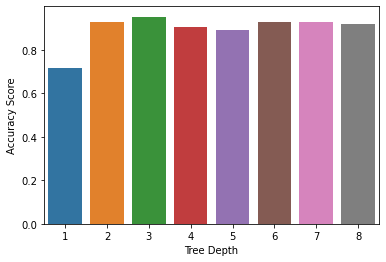

In [45]:
df_depth['Accuracy Score'] = df_depth['Accuracy Score'].astype(float)
sns.barplot(data=df_depth, x="Tree Depth", y="Accuracy Score")

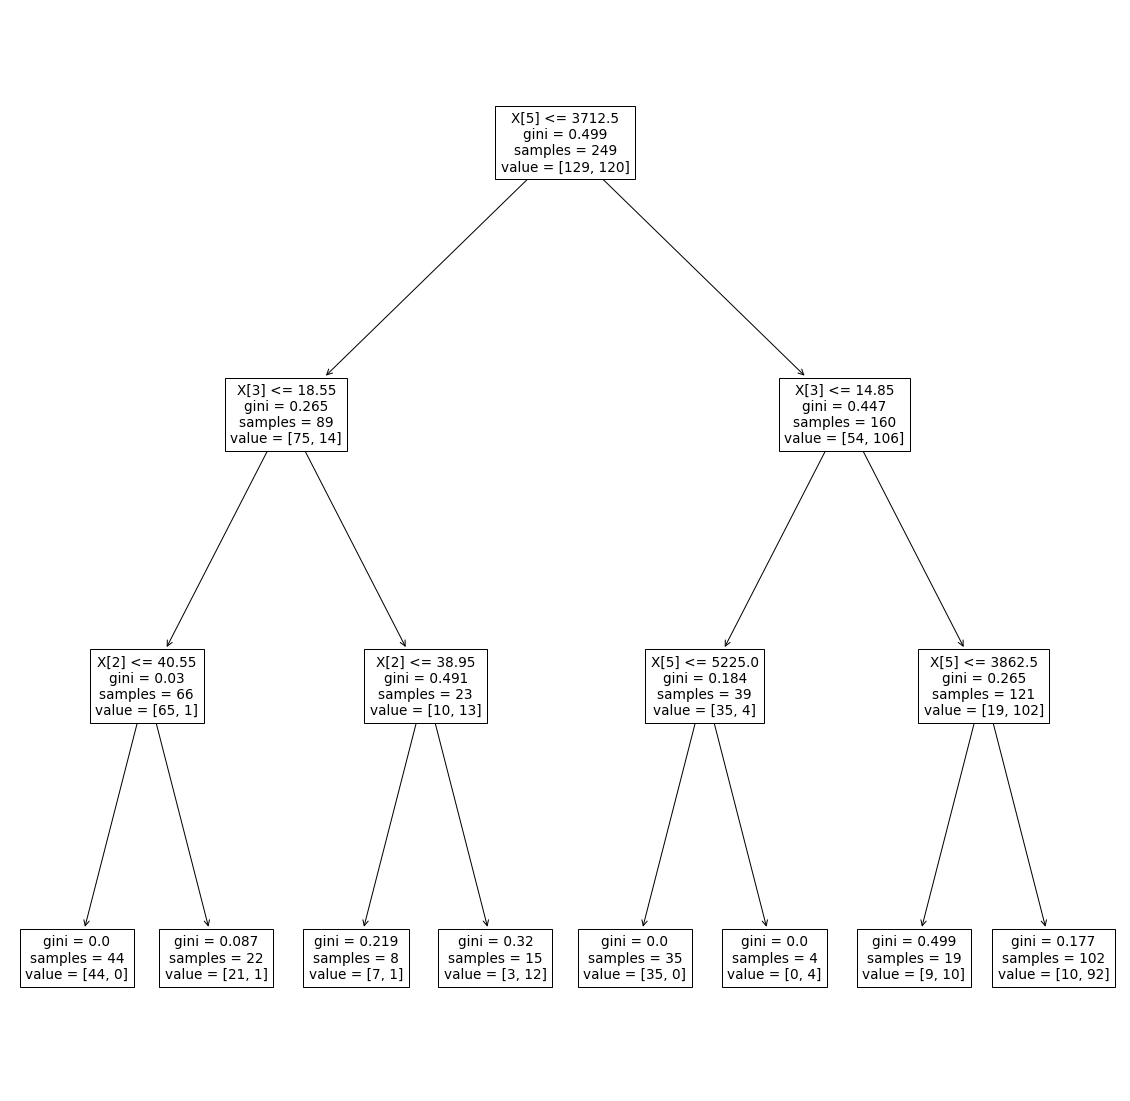

In [39]:
method = tree.DecisionTreeClassifier(max_depth=3, random_state=1)
method.fit(X_train,y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(method);

### Tree Depth Continued

It turns out that I WAS overfitting! By limiting tree depth to 3 and simplifying the tree, my accuracy value goes up to 0.952 from 0.917. An image of the new tree can be seen above. Note that you can also underfit a tree. By limiting the tree depth to 2, the accuracy score is only 0.714! That's not a good model!

While many hayperparameters can be combined during hyperparameter search and model tuning, it is unlikely with decision trees that doing so will improve the model much more. Why? Because all of the hyperparameters are adjusting the same thing, which is tree construction they're just doing so in different ways. That being said, I will still do some adjusting of other important parameters *individually*.

### Minimum Sample Split

THe minimum sample split is the minimum number of samples required for their to be a split either into new branches or leaves or a combination of branch/leaf. This prevents overfitting by making sure your not splitting samples that are close to one another down to very small braches that under-generalized.

In [56]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

min_split = []
accuracy = []

for split in [5, 10,15,20,25,30, 50]:
    method = tree.DecisionTreeClassifier(min_samples_split=split, random_state=1)
    method.fit(X_train,y_train)
    predictions = method.predict(X_test)   
    a_score = str(round(accuracy_score(y_test, predictions),3))
    
    min_split.append(split)
    accuracy.append(a_score)
    print(a_score)

df_split = pd.DataFrame(min_split)

df_split['Accuracy Score'] = accuracy
df_split = df_split.rename(columns = {0:'Minimum Samples Split'})
df_split.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_split.head(10)

0.905
0.929
0.869
0.952
0.94
0.94
0.929


,Minimum Samples Split,Accuracy Score
3,20,0.952
4,25,0.94
5,30,0.94
1,10,0.929
6,50,0.929
0,5,0.905
2,15,0.869


<AxesSubplot:xlabel='Minimum Samples Split', ylabel='Accuracy Score'>

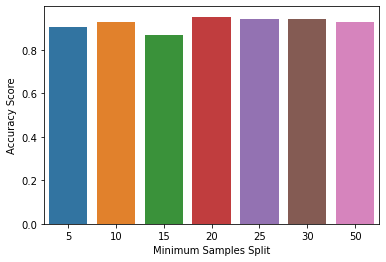

In [58]:
df_split['Accuracy Score'] = df_split['Accuracy Score'].astype(float)
sns.barplot(data=df_split, x="Minimum Samples Split", y="Accuracy Score")

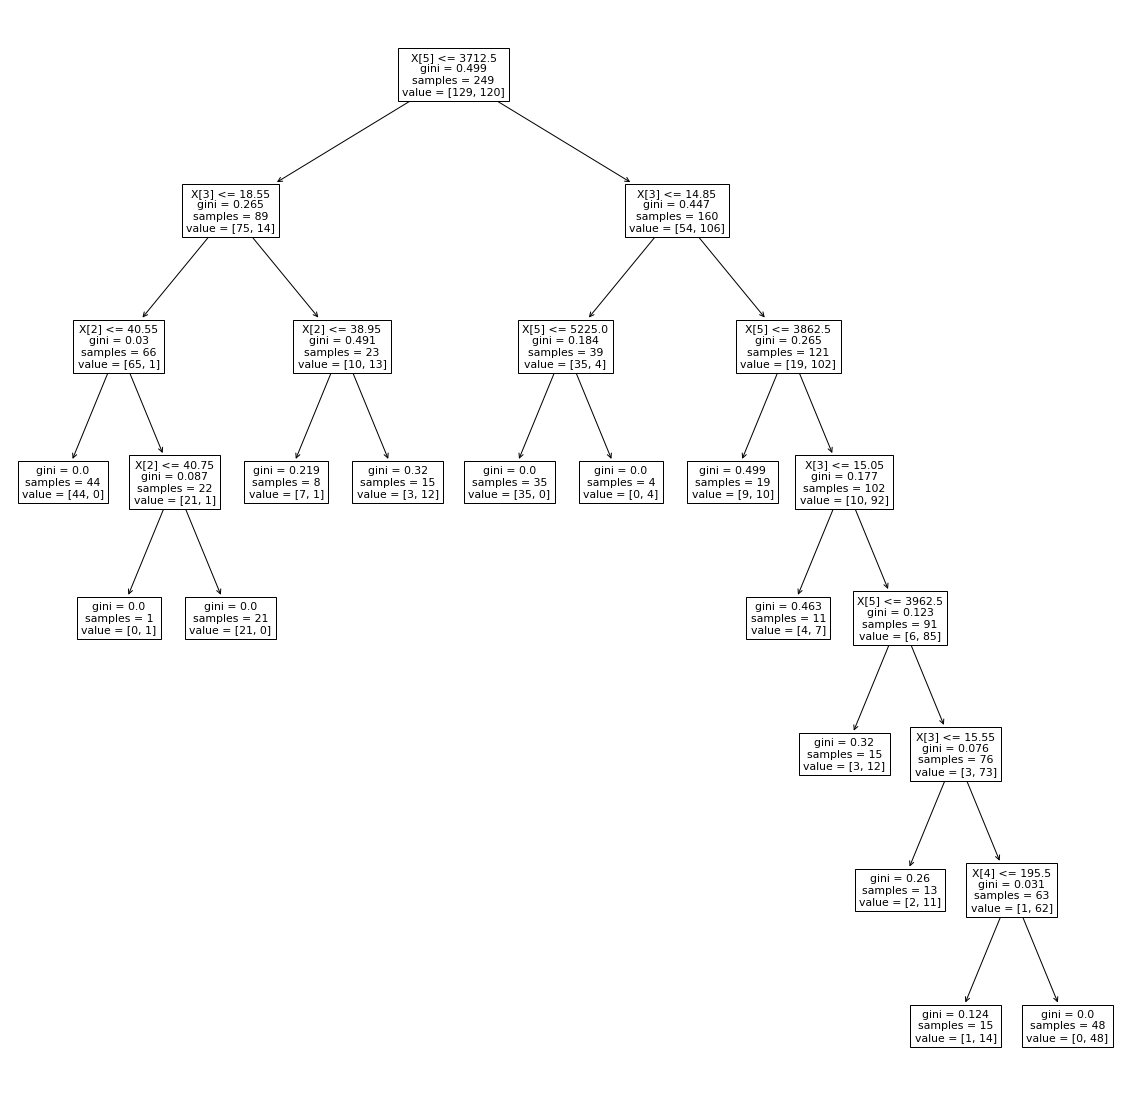

In [59]:
method = tree.DecisionTreeClassifier(min_samples_split=20, random_state=1)
method.fit(X_train,y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(method);

### Minimum Sample Split Continued

I get a similar accuracy score with a fairly different looking tree. If my data set was larger, I could see more granularity in different models and finely tuning hyper parameters in nested loops or with gridsearch or randomsearch would pay dividends.

### Minimum Samples Per Leaf

Minimum samples per leaf is the exactly what it sounds like. Setting this parameter prevents overfitting by preventing your model from creating a bunch of leaves with 1 or 2 samples and allowing it to generalize with unseen data better. 

In [67]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

min_leaf = []
accuracy = []

for leaf in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]:
    method = tree.DecisionTreeClassifier(min_samples_leaf=leaf, random_state=1)
    method.fit(X_train,y_train)
    predictions = method.predict(X_test)   
    a_score = str(round(accuracy_score(y_test, predictions),3))
    
    min_leaf.append(leaf)
    accuracy.append(a_score)

df_leaf = pd.DataFrame(min_leaf)

df_leaf['Accuracy Score'] = accuracy
df_leaf = df_leaf.rename(columns = {0:'Minimum Samples Per Leaf'})
df_leaf.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_leaf.head(10)

,Minimum Samples Per Leaf,Accuracy Score
3,4,0.952
9,10,0.929
10,20,0.929
0,1,0.917
2,3,0.917
7,8,0.905
4,5,0.893
8,9,0.893
11,25,0.893
1,2,0.869


<AxesSubplot:xlabel='Minimum Samples Per Leaf', ylabel='Accuracy Score'>

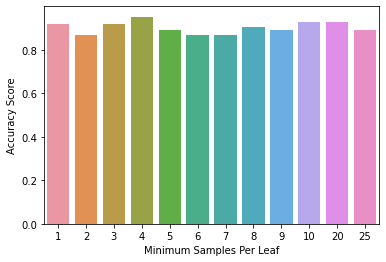

In [64]:
df_leaf['Accuracy Score'] = df_leaf['Accuracy Score'].astype(float)
sns.barplot(data=df_leaf, x="Minimum Samples Per Leaf", y="Accuracy Score")

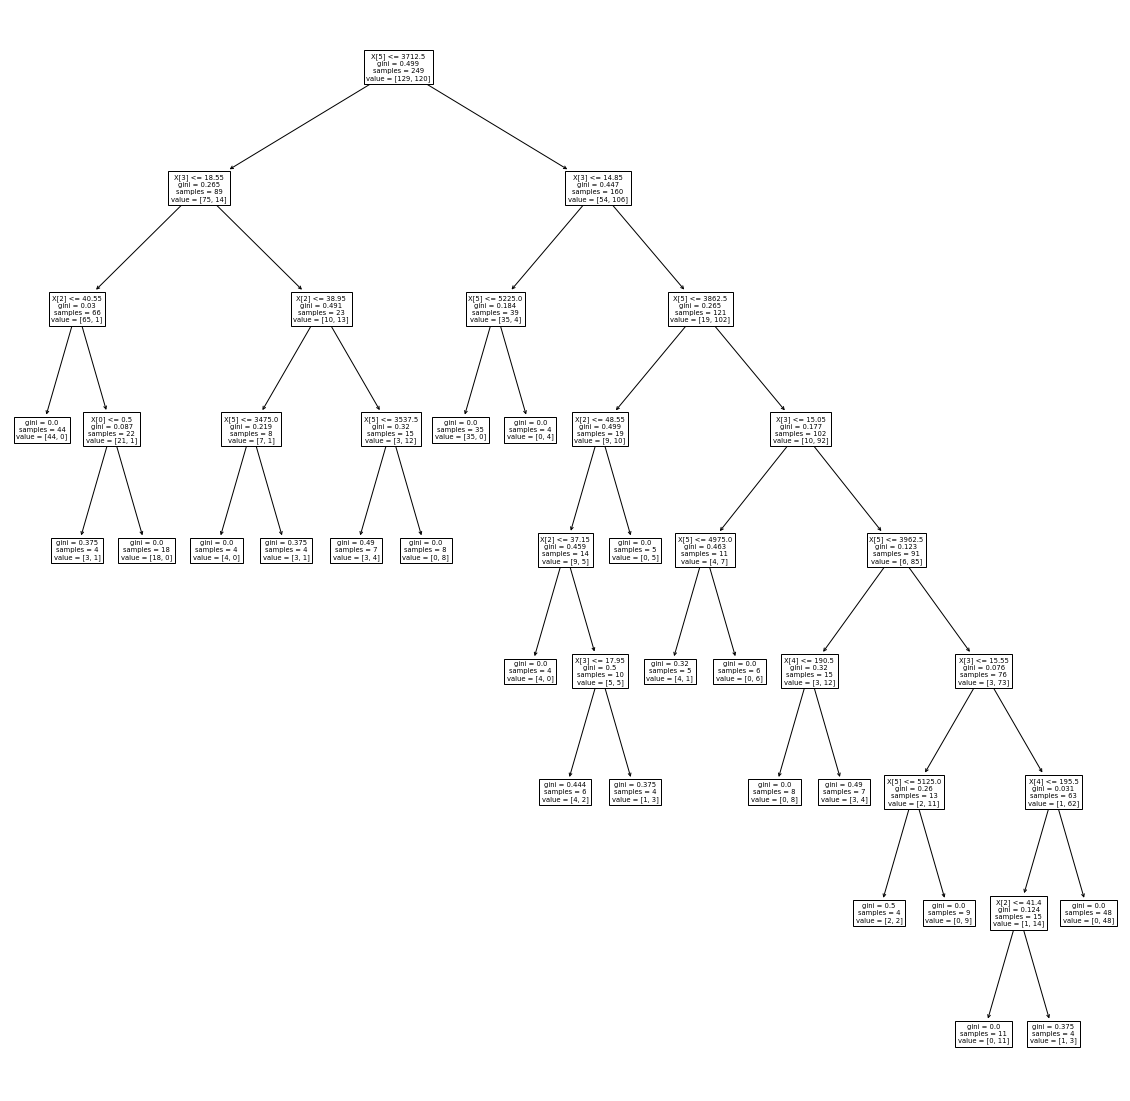

In [65]:
method = tree.DecisionTreeClassifier(min_samples_leaf=4, random_state=1)
method.fit(X_train,y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(method);

### Minimum Samples Per Leaf Continued

I'm reaching a similar accuracy score with minimum samples per leaf as I reache with min split and max depth, however my model is a bit more complex. 

### Max Leaf Nodes

Max leaf nodes specifies the maximum number of leaves I can have as endpoints on my decision tree. Limiting the amount of leaves increases the tree's ability to generalize for unseen data.

In [68]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

max_leaf = []
accuracy = []

for leaf in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25]:
    method = tree.DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=1)
    method.fit(X_train,y_train)
    predictions = method.predict(X_test)   
    a_score = str(round(accuracy_score(y_test, predictions),3))
    
    max_leaf.append(leaf)
    accuracy.append(a_score)

df_maxleaf = pd.DataFrame(max_leaf)

df_maxleaf['Accuracy Score'] = accuracy
df_maxleaf = df_maxleaf.rename(columns = {0:'Maximum Leaves'})
df_maxleaf.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_maxleaf.head(10)

,Maximum Leaves,Accuracy Score
4,6,0.952
5,7,0.952
3,5,0.94
2,4,0.929
10,25,0.929
9,20,0.917
6,8,0.905
7,9,0.905
8,10,0.905
1,3,0.893


<AxesSubplot:xlabel='Maximum Leaves', ylabel='Accuracy Score'>

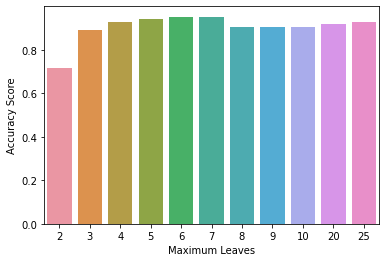

In [69]:
df_maxleaf['Accuracy Score'] = df_maxleaf['Accuracy Score'].astype(float)
sns.barplot(data=df_maxleaf, x="Maximum Leaves", y="Accuracy Score")

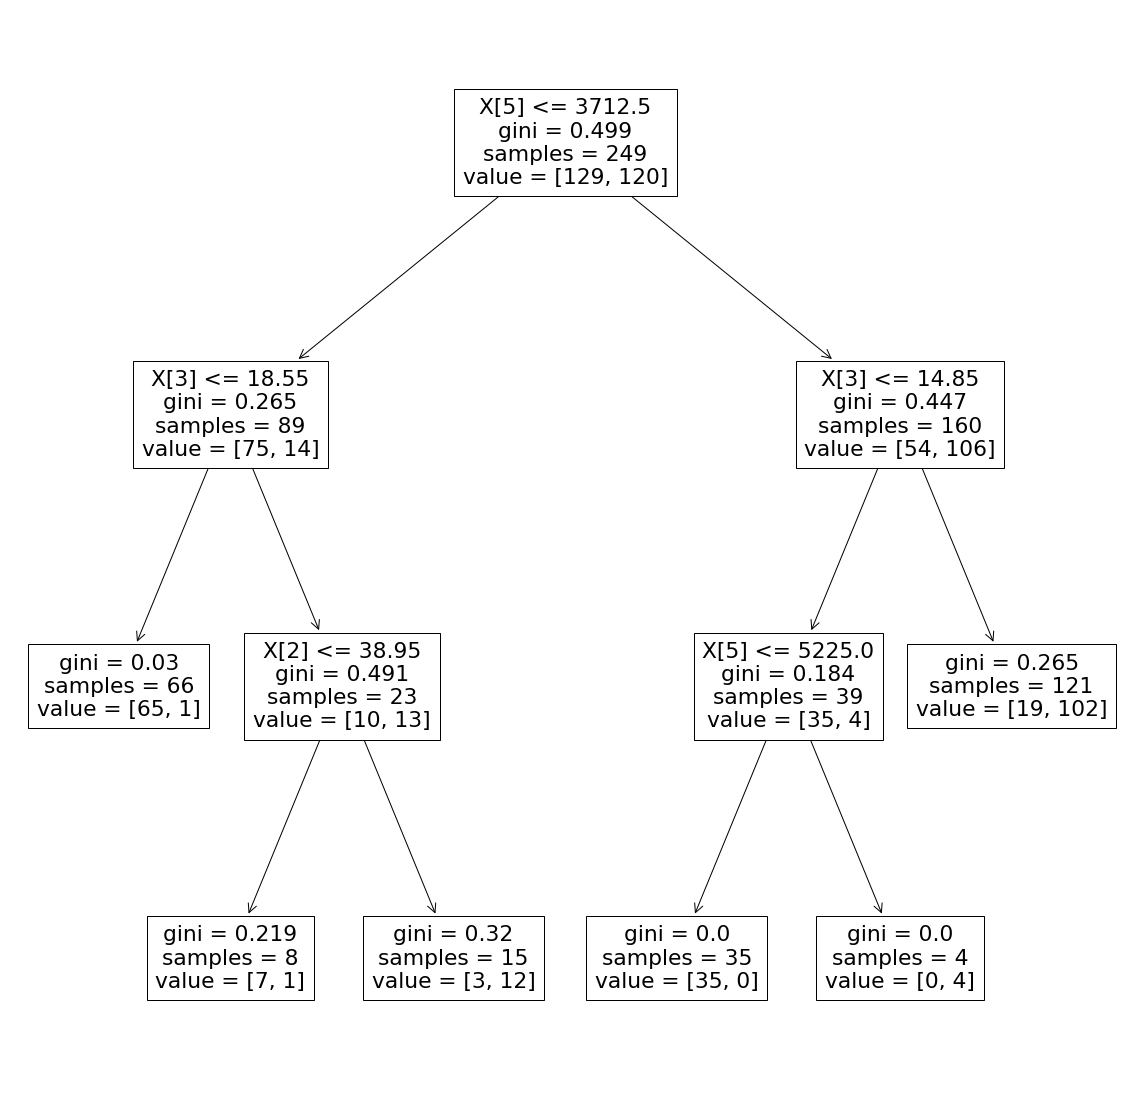

In [70]:
method = tree.DecisionTreeClassifier(max_leaf_nodes=6, random_state=1)
method.fit(X_train,y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(method);

### Max Leaf Nodes Continued

Visualize how changes the number of potential leaves effects the accuracy score and the structure of the decision tree.

## Exploration and Analysis Conclusion

My favorite parameters to change are maximum number of leaves and maxium tree depth. These parameters are all you really need in order to create accurate and easily visualized decision trees for even large data sets. All of the other parameters are obviously important, but these ones are easily able to tame Decision Tree's biggest weakness, overfitting.

## Conclusion

This is everything I think is important about decision trees. Decision Tree theory, strenghts and weaknesses, how to create decision trees with sklearn, how to judge decision tree accuracy and hyperparameter tuning